In [1]:
# 1) Import pandas and read in the banklist.csv file into a dataframe called banks.

import numpy as np
import pandas as pd

banks = pd.read_csv('/content/banklist.csv')
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
549,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


In [2]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


In [3]:
# 2) Show the head of the dataframe.

banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [4]:
# 3) What are the column names?

column_name = banks.columns.tolist()
column_name

['Bank Name',
 'City',
 'ST',
 'CERT',
 'Acquiring Institution',
 'Closing Date',
 'Updated Date']

In [5]:
# 4) How many States (ST) are represented in this data set?

banks['ST'].nunique()

44

In [6]:
# 5) Get a list or array of all the states in the data set.

banks['ST'].unique()

array(['IL', 'WI', 'LA', 'UT', 'NJ', 'AR', 'GA', 'PA', 'TN', 'WA', 'CO',
       'PR', 'FL', 'MN', 'CA', 'MD', 'OK', 'OH', 'SC', 'VA', 'ID', 'TX',
       'CT', 'AZ', 'NV', 'NC', 'KY', 'MO', 'KS', 'AL', 'MI', 'IN', 'IA',
       'NE', 'MS', 'NM', 'OR', 'NY', 'MA', 'SD', 'WY', 'WV', 'NH', 'HI'],
      dtype=object)

In [7]:
# 6) What are the top 5 states with the most failed banks?

banks['ST'].value_counts().head(10)

,count
ST,
GA,93
FL,75
IL,68
CA,41
MN,23
WA,19
AZ,16
MO,16
MI,14


In [8]:
# 7) What are the top 5 acquiring institutions?

banks['Acquiring Institution'].value_counts().head(5)

,count
Acquiring Institution,
No Acquirer,31
State Bank and Trust Company,12
First-Citizens Bank & Trust Company,11
Ameris Bank,10
U.S. Bank N.A.,9


In [9]:
# 8) How many banks has the State Bank of Texas acquired? How many of
# them were actually in Texas?

sbt = banks[banks['Acquiring Institution'] == 'State Bank of Texas']

total = len(sbt)

in_texas = len(sbt[sbt['ST'] == 'TX'])

print("Total acquired by State Bank of Texas:", total)
print("Number of those in Texas:", in_texas)

banks[(banks['Acquiring Institution'] == 'State Bank of Texas')]

Total acquired by State Bank of Texas: 3
Number of those in Texas: 1


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
21,The National Republic Bank of Chicago,Chicago,IL,916,State Bank of Texas,24-Oct-14,6-Jan-16
450,Millennium State Bank of Texas,Dallas,TX,57667,State Bank of Texas,2-Jul-09,26-Oct-12


In [10]:
# 9) What is the most common city in California for a bank to fail in?

banks[banks['ST'] == 'CA'].groupby('City').count().sort_values('Bank Name', ascending=False).head()

,Bank Name,ST,CERT,Acquiring Institution,Closing Date,Updated Date
City,,,,,,
Los Angeles,4,4,4,4,4,4
San Francisco,2,2,2,2,2,2
La Jolla,2,2,2,2,2,2
Palm Desert,2,2,2,2,2,2
Newport Beach,2,2,2,2,2,2


In [11]:
# Q 1: Develop a Line chart using the functionality of pandas to show how
# automobile sales fluctuate from year to year.

import pandas as pd
import matplotlib.pyplot as plt

auto_sales = pd.read_csv('/content/historical_automobile_sales.csv')
auto_sales

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


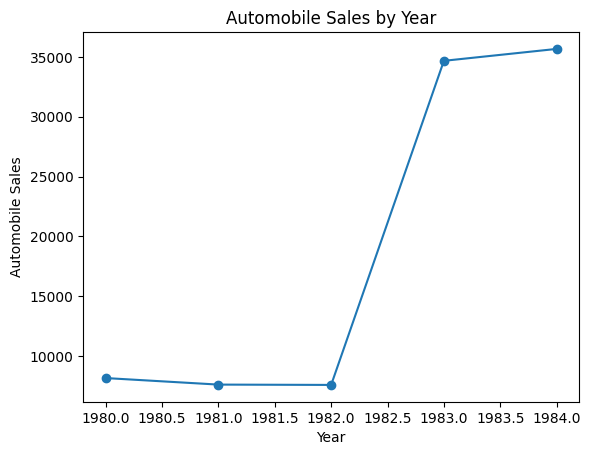

In [18]:
sales_by_year = auto_sales.groupby("Year")["Automobile_Sales"].sum().head(5)

sales_by_year.plot(kind='line', marker='o')
plt.title("Automobile Sales by Year")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.show()

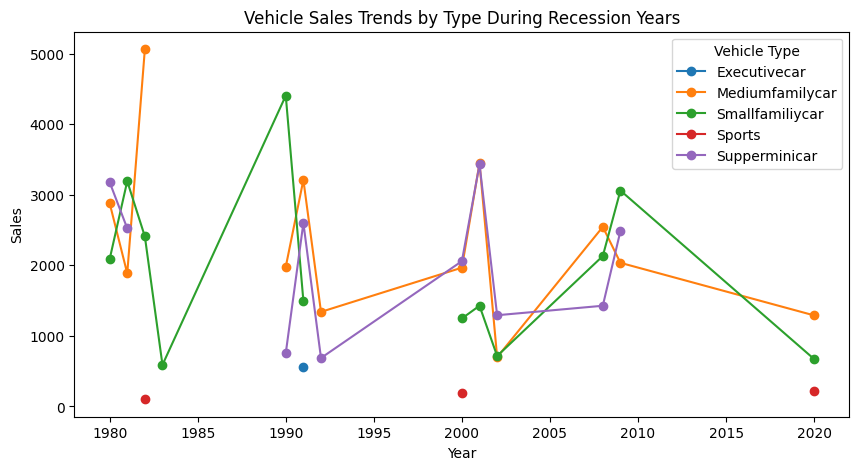

In [33]:
# Q 2: Plot different lines for categories of vehicle type and analyze the trend
# to answer the question Is there a noticeable difference in sales trends
# between different vehicle types during recession periods?

recession_data = auto_sales[auto_sales["Recession"] == True]

grouped = recession_data.groupby(["Year", "Vehicle_Type"])["Automobile_Sales"].sum().unstack()

grouped.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Vehicle Sales Trends by Type During Recession Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title="Vehicle Type")
plt.show()

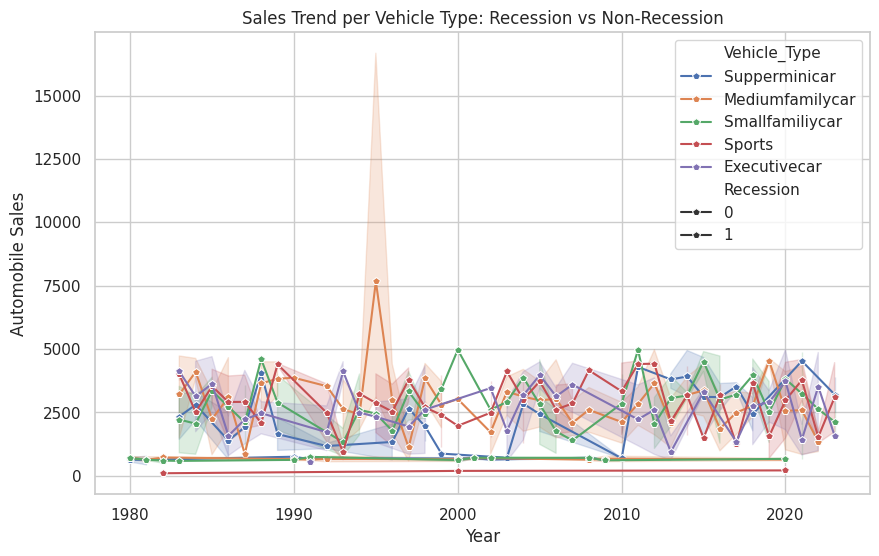

In [112]:
# Q 3: Use the functionality of Seaborn Library to create a visualization to compare
# the sales trend per vehicle type for a recession period with a non- recession period.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Automobile_Sales", data=auto_sales, hue="Vehicle_Type", style="Recession", marker="p", dashes=False)

plt.title("Sales Trend per Vehicle Type: Recession vs Non-Recession")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.show()

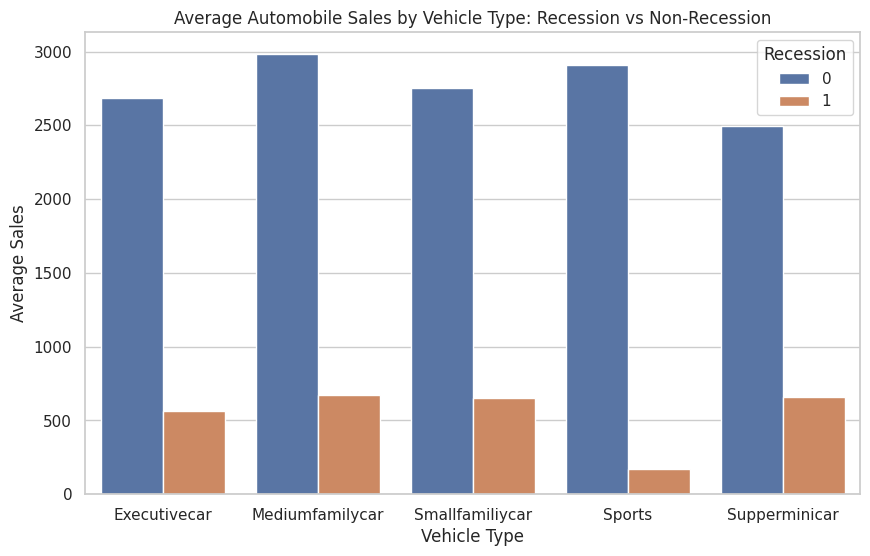

In [113]:
# Q 4: Now you want to compare the sales of different vehicle types
# during a recession and a non-recession period

grouped_sales = auto_sales.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=grouped_sales)

plt.title('Average Automobile Sales by Vehicle Type: Recession vs Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Sales')
plt.show()